In [2]:
import h5py

# Correcting the approach to correctly handle groups and datasets in the HDF5 file
def explore_hdf5_group(group, path=""):
    """
    Recursively explores the contents of an HDF5 group, collecting information about
    its datasets and subgroups.
    """
    items = {}
    for key in group.keys():
        if isinstance(group[key], h5py.Dataset):
            # For datasets, store their shape and data type
            items[path + key] = {"type": "Dataset", "shape": group[key].shape, "dtype": str(group[key].dtype)}
        elif isinstance(group[key], h5py.Group):
            # For groups, recursively explore their contents
            items.update(explore_hdf5_group(group[key], path + key + "/"))
    return items

file_path = 'Ar46_4D.hdf5'
# Open the HDF5 file again and explore its contents properly
with h5py.File(file_path, 'r') as file:
    # Use the new function to explore the file from the root group
    file_structure = explore_hdf5_group(file)

# Showing a preview of the file structure (first few items for brevity)
list(file_structure.items())[:5]


# Open the new HDF5 file to examine its structure
new_file_path = 'Ar46_4D.hdf5'

with h5py.File(new_file_path, 'r') as file:
    # Use the function to explore the file from the root group
    new_file_structure = explore_hdf5_group(file)

# Showing a preview of the new file structure (first few items for brevity)
list(new_file_structure.items())[:5]


[('46000046/test',
  {'type': 'Dataset', 'shape': (192, 256, 4), 'dtype': 'float32'}),
 ('46000046/train',
  {'type': 'Dataset', 'shape': (460, 256, 4), 'dtype': 'float32'}),
 ('46000046/val',
  {'type': 'Dataset', 'shape': (308, 256, 4), 'dtype': 'float32'})]

In [5]:
# Path to the newly uploaded HDF5 file
new_file_path_ar46 = 'Ar46_4D.hdf5'

# Open the new HDF5 file and explore its structure
with h5py.File(new_file_path_ar46, 'r') as file:
    # Use the function to explore the file from the root group
    new_file_structure_ar46 = explore_hdf5_group(file)

# Showing a preview of the new file structure (first few items for brevity)
list(new_file_structure_ar46.items())[:5]


[('46000046/test',
  {'type': 'Dataset', 'shape': (192, 256, 4), 'dtype': 'float32'}),
 ('46000046/train',
  {'type': 'Dataset', 'shape': (460, 256, 4), 'dtype': 'float32'}),
 ('46000046/val',
  {'type': 'Dataset', 'shape': (308, 256, 4), 'dtype': 'float32'})]

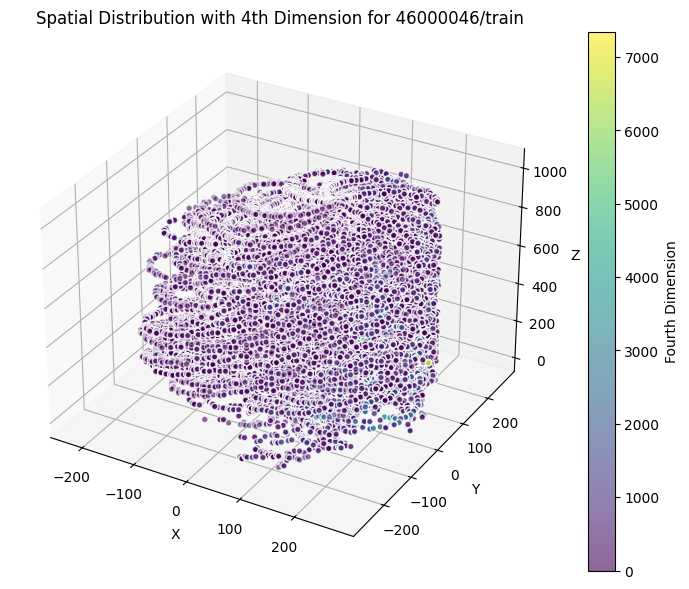

In [6]:
def plot_4d_spatial_distribution(file, dataset_name):
    data = np.array(file[dataset_name])
    # Assuming the first three dimensions are spatial coordinates (x, y, z)
    x, y, z = data[..., 0], data[..., 1], data[..., 2]
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=data[..., 3], cmap='viridis', alpha=0.6, edgecolors='w')
    fig.colorbar(scatter, ax=ax, label='Fourth Dimension')
    
    ax.set_title(f"Spatial Distribution with 4th Dimension for {dataset_name}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Plot the spatial distribution for 'train' subset
with h5py.File(new_file_path_ar46, 'r') as file:
    plot_4d_spatial_distribution(file, '46000046/train')


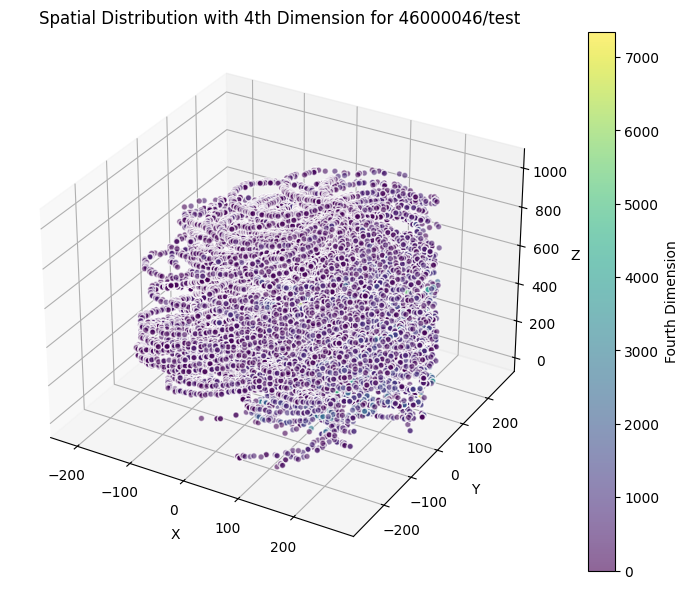

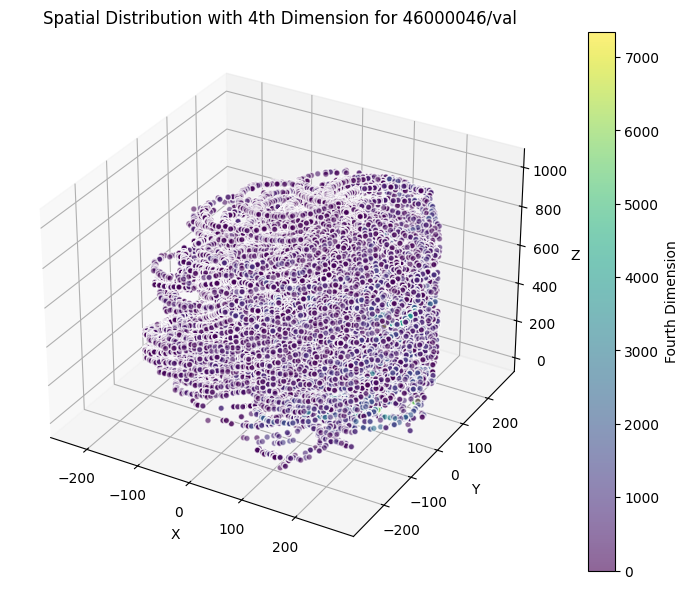

In [7]:
# Plot the spatial distribution for 'test' and 'val' subsets
with h5py.File(new_file_path_ar46, 'r') as file:
    # Plotting for 'test' subset
    plot_4d_spatial_distribution(file, '46000046/test')
    
    # Plotting for 'val' subset
    plot_4d_spatial_distribution(file, '46000046/val')


In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# First event data
event_1 = data[0]

# Extracting X, Y, Z coordinates
X = event_1[:, 0]
Y = event_1[:, 1]
Z = event_1[:, 2]

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X, Y, Z, c='blue', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Plot of the First Event')

plt.show()


NameError: name 'data' is not defined

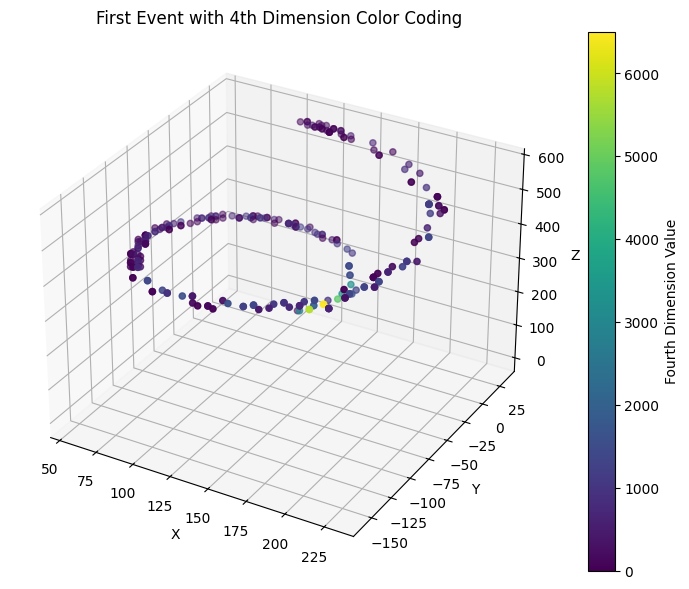

In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Path to your HDF5 file
file_path = 'Ar46_4D.hdf5'

# Opening the HDF5 file
with h5py.File(file_path, 'r') as file:
    # Accessing the first event from the 'train' dataset
    # Adjust the path if you want to plot from another dataset like 'test' or 'val'
    first_event = file['46000046/train'][0]

# Extracting X, Y, Z coordinates and the fourth dimension (for color coding)
X = first_event[:, 0]
Y = first_event[:, 1]
Z = first_event[:, 2]
C = first_event[:, 3]  # Fourth dimension for color

# Creating a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Using the fourth dimension for color coding
scatter = ax.scatter(X, Y, Z, c=C, cmap='viridis')

# Adding a color bar to interpret the fourth dimension
plt.colorbar(scatter, ax=ax, label='Fourth Dimension Value')

# Setting labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('First Event with 4th Dimension Color Coding')

# Show plot
plt.show()


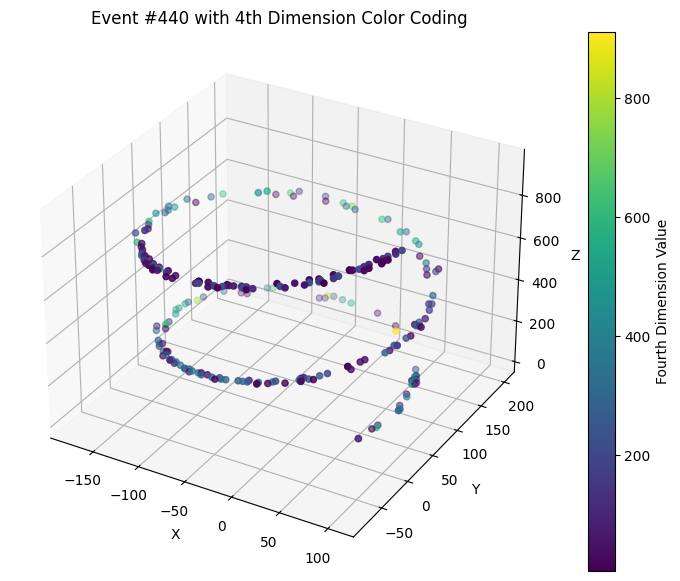

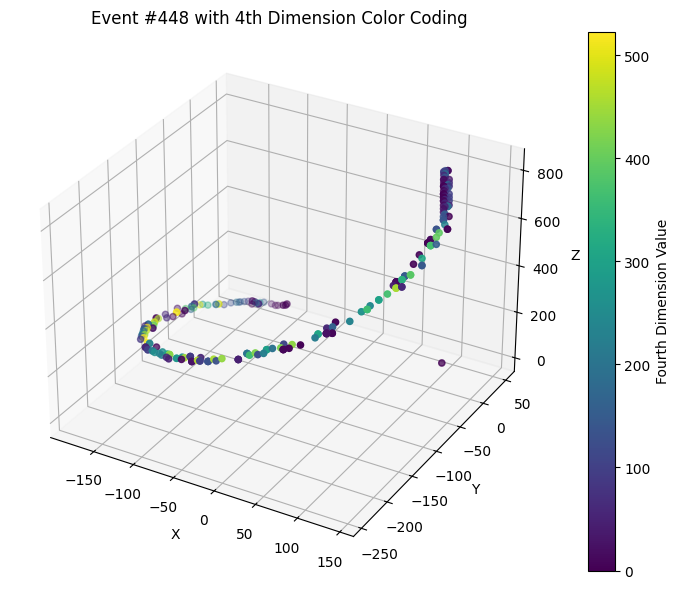

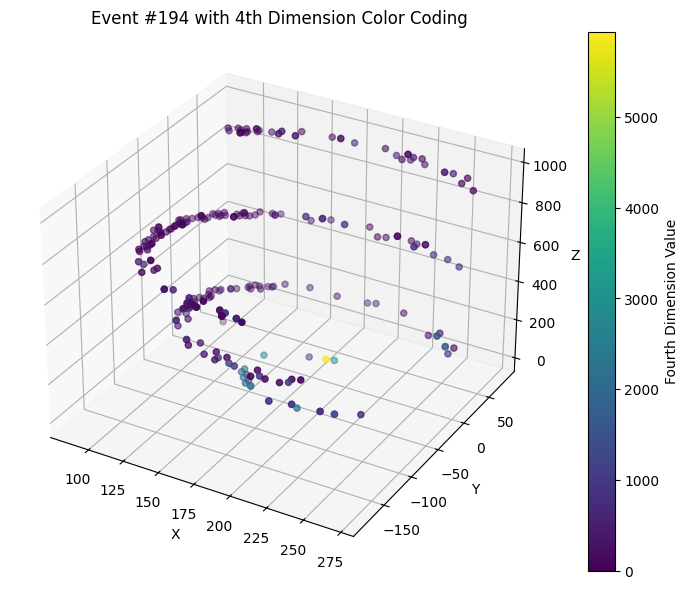

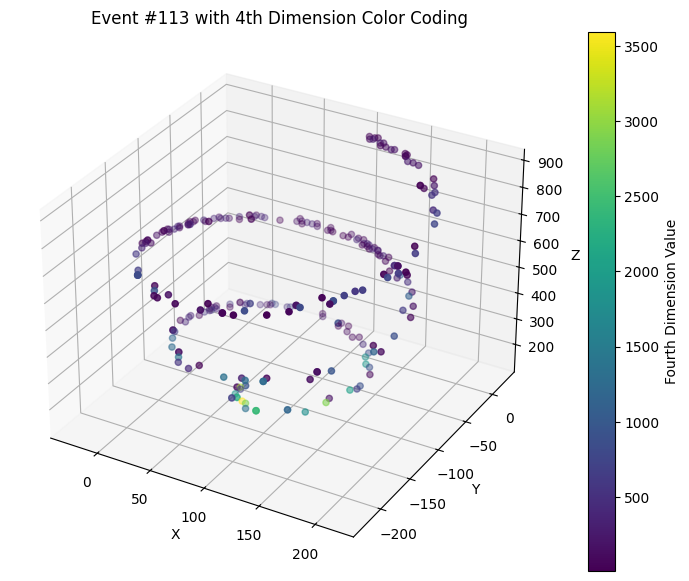

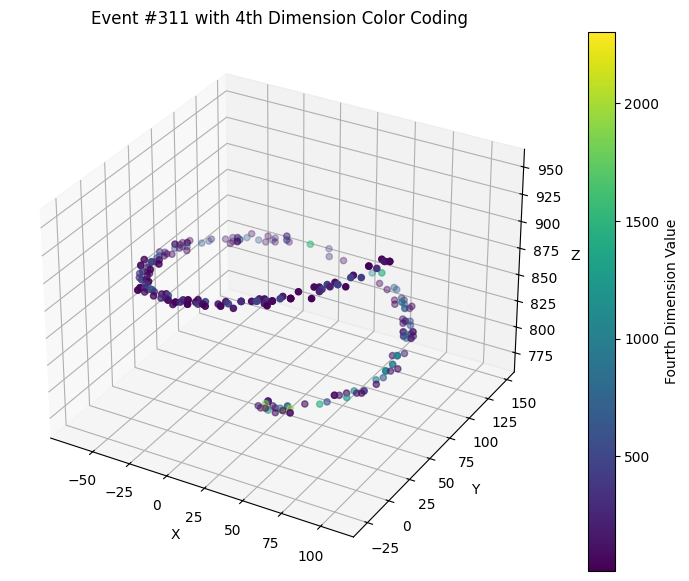

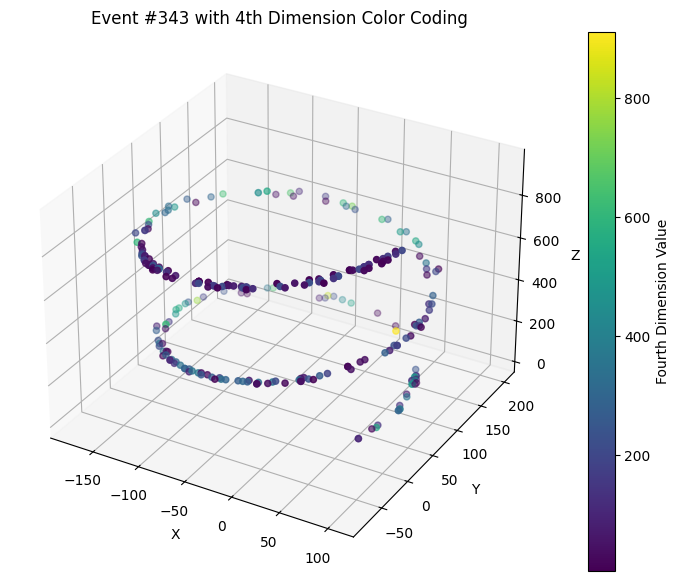

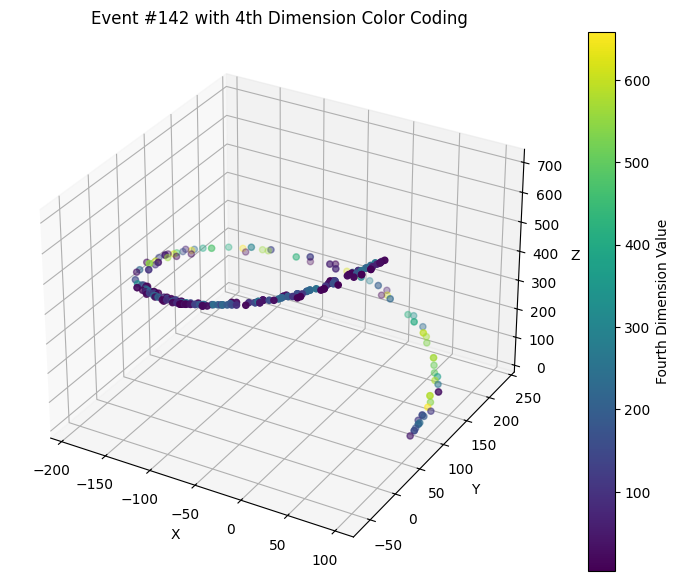

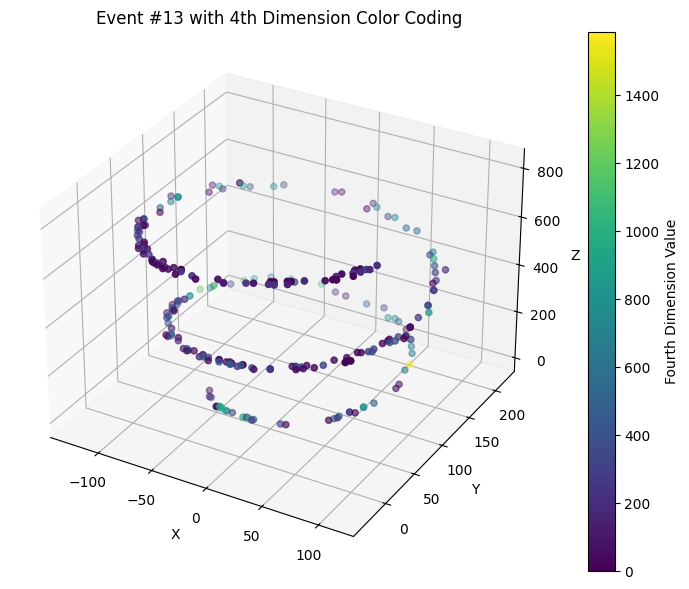

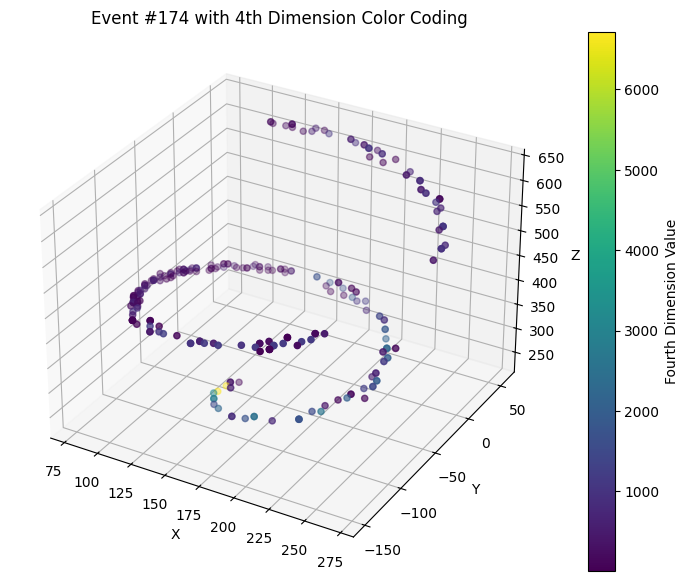

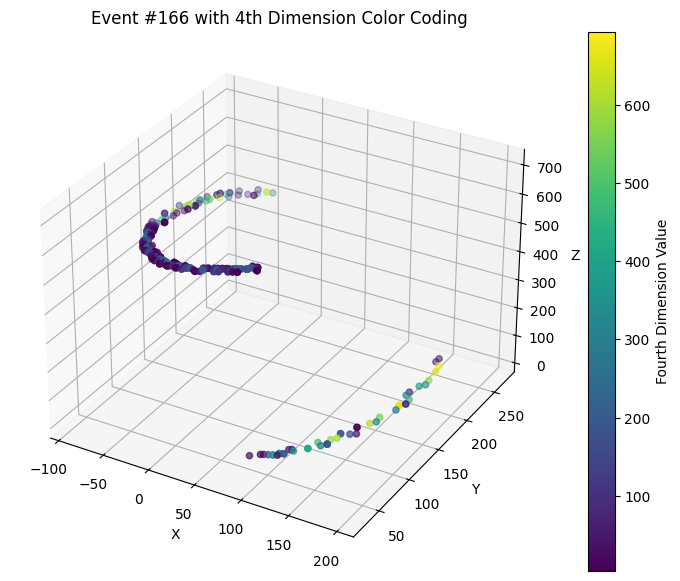

In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Path to your HDF5 file
file_path = 'Ar46_4D.hdf5'

# Number of events to plot
num_events_to_plot = 10

with h5py.File(file_path, 'r') as file:
    # Assuming you're working with the 'train' dataset
    total_events = file['46000046/train'].shape[0]
    
    # Generating random indices for events
    random_indices = np.random.choice(total_events, num_events_to_plot, replace=False)
    
    for index in random_indices:
        # Accessing a random event
        event = file['46000046/train'][index]

        # Extracting X, Y, Z coordinates and the fourth dimension for color coding
        X = event[:, 0]
        Y = event[:, 1]
        Z = event[:, 2]
        C = event[:, 3]  # Fourth dimension

        # Creating a 3D plot for the event
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot with color coding
        scatter = ax.scatter(X, Y, Z, c=C, cmap='viridis')
        plt.colorbar(scatter, ax=ax, label='Fourth Dimension Value')

        # Setting labels and title
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Event #{index} with 4th Dimension Color Coding')

        # Display plot
        plt.show()
